In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
import os
from pyspark.sql import SparkSession
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import when
from pyspark.sql.functions import lit
from pyspark.sql.functions import format_number, col
import operator
spark = SparkSession.builder.appName('basics').getOrCreate()
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = spark.read.csv('AppleStore.csv',header=True,inferSchema=True,nullValue='')

### 2.2 Describe the data

In [3]:
# Displays the content of the DataFrame to stdout
df.show()

+---+---------+--------------------+----------+--------+-----+----------------+----------------+-----------+---------------+-------+-----------+-----------------+---------------+---------------+--------+-------+
|_c0|       id|          track_name|size_bytes|currency|price|rating_count_tot|rating_count_ver|user_rating|user_rating_ver|    ver|cont_rating|      prime_genre|sup_devices.num|ipadSc_urls.num|lang.num|vpp_lic|
+---+---------+--------------------+----------+--------+-----+----------------+----------------+-----------+---------------+-------+-----------+-----------------+---------------+---------------+--------+-------+
|  1|281656475|     PAC-MAN Premium| 100788224|     USD| 3.99|           21292|              26|        4.0|            4.5|  6.3.5|         4+|            Games|             38|              5|      10|      1|
|  2|281796108|Evernote - stay o...| 158578688|     USD|  0.0|          161065|              26|        4.0|            3.5|  8.2.2|         4+|     Pro

In [4]:
#1)count the number of rows 
df.count()

7197

In [5]:
#count the number of columns 
len(df.columns)

17

In [6]:
#2) value types
df.dtypes

[('_c0', 'int'),
 ('id', 'int'),
 ('track_name', 'string'),
 ('size_bytes', 'bigint'),
 ('currency', 'string'),
 ('price', 'double'),
 ('rating_count_tot', 'int'),
 ('rating_count_ver', 'int'),
 ('user_rating', 'double'),
 ('user_rating_ver', 'double'),
 ('ver', 'string'),
 ('cont_rating', 'string'),
 ('prime_genre', 'string'),
 ('sup_devices.num', 'int'),
 ('ipadSc_urls.num', 'int'),
 ('lang.num', 'int'),
 ('vpp_lic', 'int')]

In [7]:
# Print the schema in a tree format
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- track_name: string (nullable = true)
 |-- size_bytes: long (nullable = true)
 |-- currency: string (nullable = true)
 |-- price: double (nullable = true)
 |-- rating_count_tot: integer (nullable = true)
 |-- rating_count_ver: integer (nullable = true)
 |-- user_rating: double (nullable = true)
 |-- user_rating_ver: double (nullable = true)
 |-- ver: string (nullable = true)
 |-- cont_rating: string (nullable = true)
 |-- prime_genre: string (nullable = true)
 |-- sup_devices.num: integer (nullable = true)
 |-- ipadSc_urls.num: integer (nullable = true)
 |-- lang.num: integer (nullable = true)
 |-- vpp_lic: integer (nullable = true)



In [8]:
#3) coding schemme
df = df.withColumnRenamed('sup_devices.num','sup_devices_num')

In [9]:
df = df.withColumnRenamed('ipadSc_urls.num','ipadSc_urls_num')

In [10]:
df = df.withColumnRenamed('lang.num','lang_num')

In [11]:
#Import pandas 
import pandas as pd
pd = df.toPandas()
pd.head()

,_c0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [12]:
pd.describe()

,_c0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


### 2.3 Explore the data

+-----------+--------------------+
|user_rating|     avg(size_bytes)|
+-----------+--------------------+
|        0.0|1.5454625011194834E8|
|        3.5|2.0447049252421653E8|
|        4.5|2.1632241603379646E8|
|        2.5|1.2382982716836734E8|
|        1.0| 6.311240145454545E7|
|        4.0|2.3838793608856088E8|
|        3.0|1.6941689009660575E8|
|        2.0| 8.878507389622642E7|
|        1.5|      6.3979661125E7|
|        5.0|1.5740893199796748E8|
+-----------+--------------------+



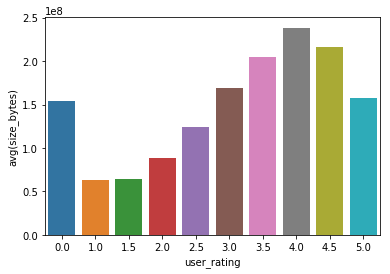

In [13]:
#average size bytes, gourped by user rating 
grouped1 = df.select('size_bytes', 'user_rating').groupby('user_rating').mean('size_bytes')
sns.barplot(x='user_rating', y='avg(size_bytes)', data=grouped1.toPandas())
grouped1.show()

+-----------+------------------+
|user_rating|        avg(price)|
+-----------+------------------+
|        0.0|1.0801291711517784|
|        3.5| 1.757435897435901|
|        4.5| 1.802110401802427|
|        2.5|1.1032142857142866|
|        1.0|1.9265909090909084|
|        4.0| 2.209864698646936|
|        3.0| 1.288067885117496|
|        2.0| 1.155754716981131|
|        1.5|1.2089285714285716|
|        5.0|1.6455894308943124|
+-----------+------------------+



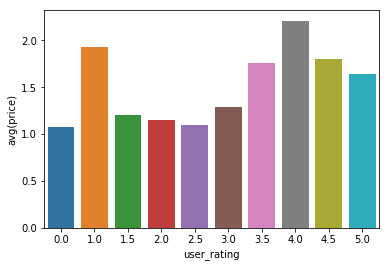

In [14]:
#average price, gourped by user rating 
grouped2 = df.select('price', 'user_rating').groupby('user_rating').mean('price')
sns.barplot(x='user_rating', y='avg(price)', data=grouped2.toPandas())
grouped2.show()

+-----------+---------------------+
|user_rating|avg(rating_count_tot)|
+-----------+---------------------+
|        0.0|                  0.0|
|        3.5|   15503.266381766382|
|        4.5|   22029.743522343222|
|        2.5|    5419.933673469388|
|        1.0|   29.568181818181817|
|        4.0|    7836.835793357934|
|        3.0|    7487.130548302872|
|        2.0|    2907.235849056604|
|        1.5|                203.5|
|        5.0|   12699.829268292682|
+-----------+---------------------+



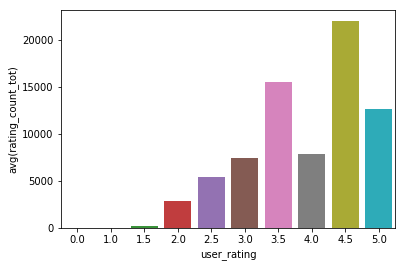

In [15]:
grouped3 = df.select('rating_count_tot', 'user_rating').groupby('user_rating').mean('rating_count_tot')
sns.barplot(x='user_rating', y='avg(rating_count_tot)', data=grouped3.toPandas())
grouped3.show()

+-----------+---------------------+
|user_rating|avg(rating_count_ver)|
+-----------+---------------------+
|        0.0|                  0.0|
|        3.5|   138.28774928774928|
|        4.5|    803.0623357116035|
|        2.5|    50.53061224489796|
|        1.0|   17.204545454545453|
|        4.0|   301.08425584255843|
|        3.0|   234.92689295039165|
|        2.0|   62.075471698113205|
|        1.5|   22.482142857142858|
|        5.0|    974.8739837398374|
+-----------+---------------------+



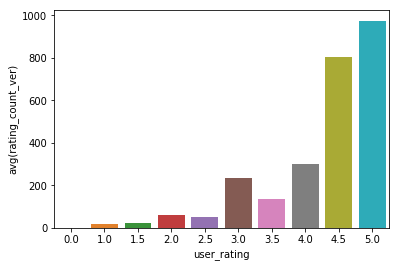

In [16]:
grouped4 = df.select('rating_count_ver', 'user_rating').groupby('user_rating').mean('rating_count_ver')
sns.barplot(x='user_rating', y='avg(rating_count_ver)', data=grouped4.toPandas())
grouped4.show()


+-----------+--------------------+
|user_rating|avg(user_rating_ver)|
+-----------+--------------------+
|        0.0|                 0.0|
|        3.5|   3.158119658119658|
|        4.5|   4.199023657529103|
|        2.5|  2.2933673469387754|
|        1.0|  0.9772727272727273|
|        4.0|  3.7367773677736777|
|        3.0|   2.647519582245431|
|        2.0|  1.9858490566037736|
|        1.5|                1.25|
|        5.0|   4.378048780487805|
+-----------+--------------------+



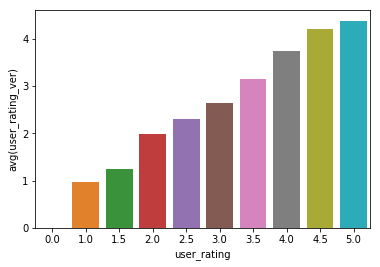

In [17]:
grouped5 = df.select('user_rating_ver', 'user_rating').groupby('user_rating').mean('user_rating_ver')
sns.barplot(x='user_rating', y='avg(user_rating_ver)', data=grouped5.toPandas())
grouped5.show()

+-----------+--------------------+
|user_rating|avg(sup_devices_num)|
+-----------+--------------------+
|        0.0|   38.05274488697524|
|        3.5|    36.7977207977208|
|        4.5|   37.43484791588434|
|        2.5|   36.41326530612245|
|        1.0|   38.04545454545455|
|        4.0|   37.26383763837639|
|        3.0|  36.668407310704964|
|        2.0|  37.264150943396224|
|        1.5|   37.80357142857143|
|        5.0|   37.61788617886179|
+-----------+--------------------+



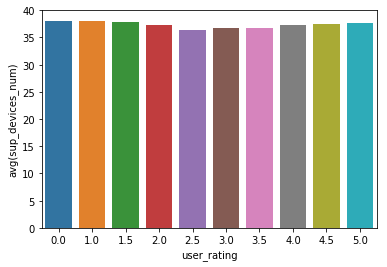

In [18]:
grouped6 = df.select('sup_devices_num', 'user_rating').groupby('user_rating').mean('sup_devices_num')
sns.barplot(x='user_rating', y='avg(sup_devices_num)', data=grouped6.toPandas())
grouped6.show()

+-----------+--------------------+
|user_rating|avg(ipadSc_urls_num)|
+-----------+--------------------+
|        0.0|   2.582346609257266|
|        3.5|   3.658119658119658|
|        4.5|   4.136687945925647|
|        2.5|  2.9183673469387754|
|        1.0|   2.477272727272727|
|        4.0|   4.031365313653136|
|        3.0|  3.1383812010443863|
|        2.0|  2.9150943396226414|
|        1.5|  2.1964285714285716|
|        5.0|  3.7134146341463414|
+-----------+--------------------+



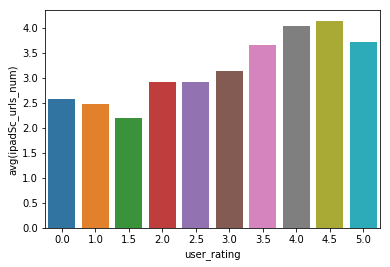

In [19]:
grouped7 = df.select('ipadSc_urls_num', 'user_rating').groupby('user_rating').mean('ipadSc_urls_num')
sns.barplot(x='user_rating', y='avg(ipadSc_urls_num)', data=grouped7.toPandas())
grouped7.show()

+-----------+------------------+
|user_rating|     avg(lang_num)|
+-----------+------------------+
|        0.0|  2.36275565123789|
|        3.5| 5.777777777777778|
|        4.5|6.7416447615471276|
|        2.5| 4.545918367346939|
|        1.0| 2.727272727272727|
|        4.0| 5.911439114391144|
|        3.0| 4.057441253263708|
|        2.0|2.9150943396226414|
|        1.5| 2.232142857142857|
|        5.0|  4.67479674796748|
+-----------+------------------+



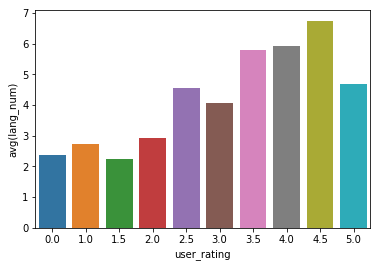

In [20]:
grouped8 = df.select('lang_num', 'user_rating').groupby('user_rating').mean('lang_num')
sns.barplot(x='user_rating', y='avg(lang_num)', data=grouped8.toPandas())
grouped8.show()

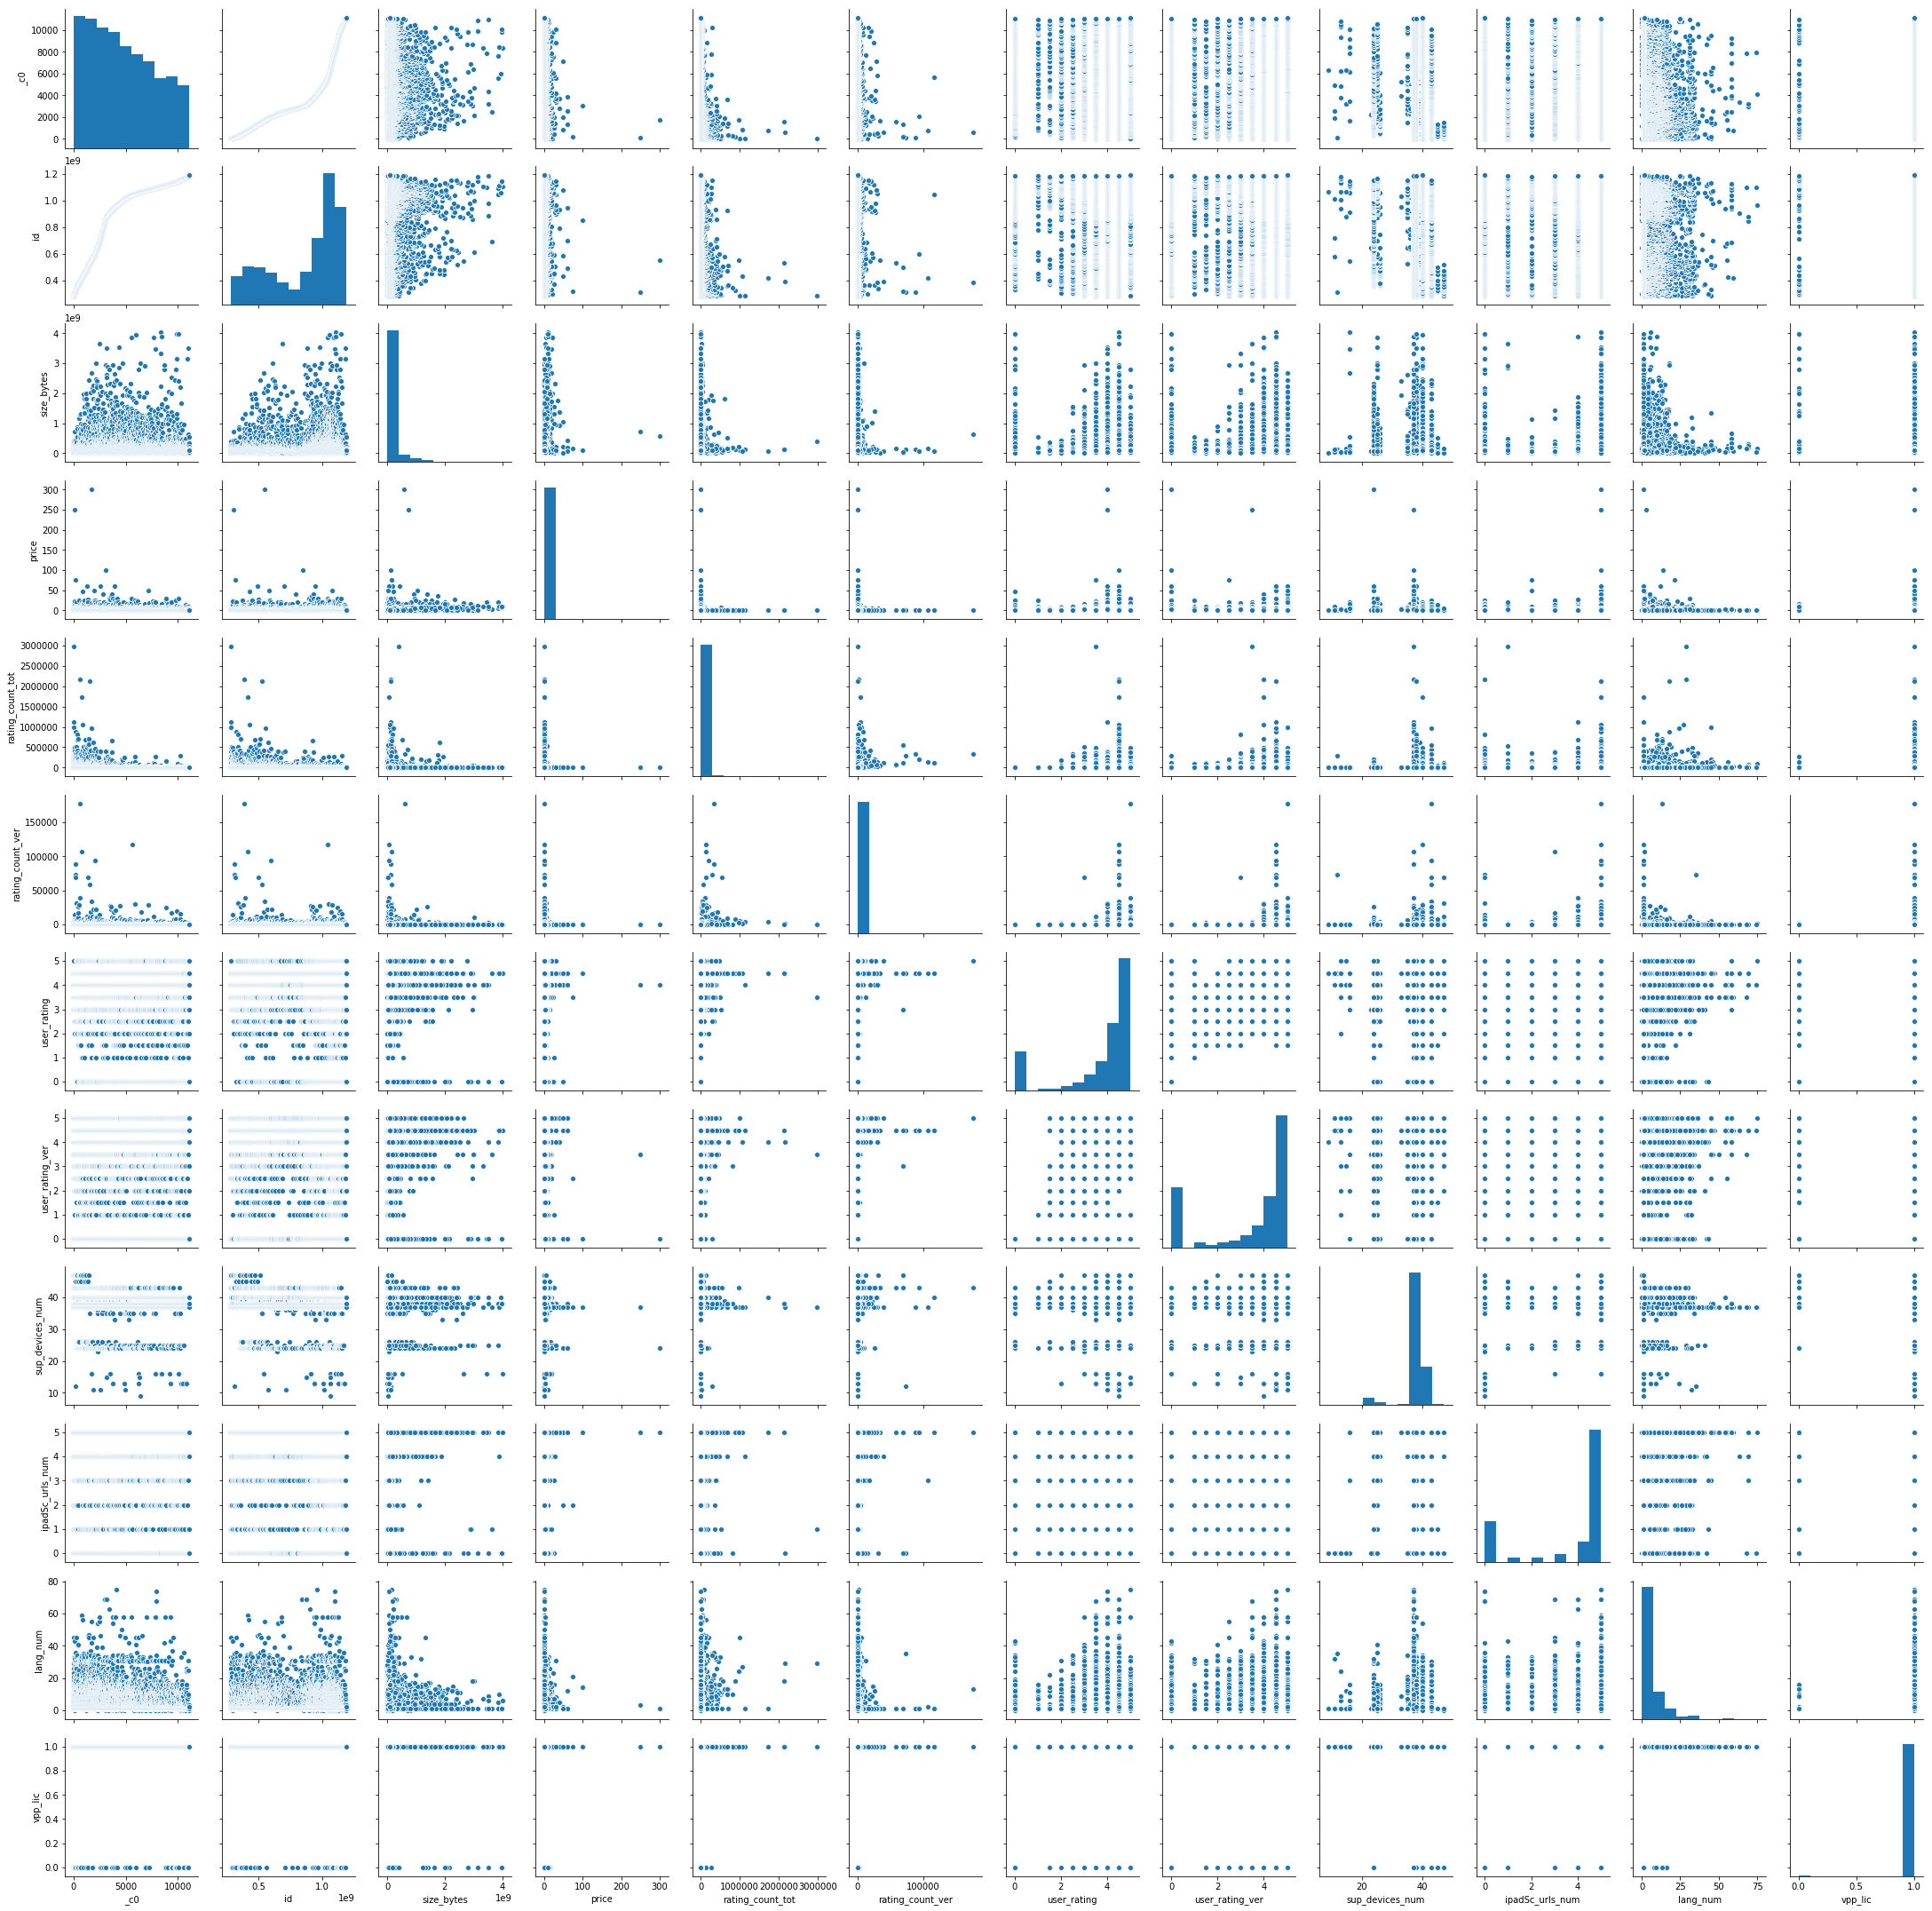

In [21]:
#https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
# Create the default pairplot
sns.pairplot(pd)

### 2.4 Verify the data quality

In [22]:
#Exploring Null Values
def count_nulls(df):
    null_counts = []          #make an empty list to hold our results
    for col in df.dtypes:     #iterate through the column data types we saw above, e.g. ('C0', 'bigint')
        cname = col[0]        #splits out the column name, e.g. 'C0'    
        ctype = col[1]        #splits out the column type, e.g. 'bigint'
        if ctype != 'string': #skip processing string columns for efficiency (can't have nulls)
            nulls = df.where( df[cname].isNull() ).count()
            result = tuple([cname, nulls])  #new tuple, (column name, null count)
            null_counts.append(result)      #put the new tuple in our result list
    return null_counts

null_counts = count_nulls(df)
null_counts

[('_c0', 0),
 ('id', 0),
 ('size_bytes', 0),
 ('price', 0),
 ('rating_count_tot', 0),
 ('rating_count_ver', 0),
 ('user_rating', 0),
 ('user_rating_ver', 0),
 ('sup_devices_num', 0),
 ('ipadSc_urls_num', 0),
 ('lang_num', 0),
 ('vpp_lic', 0)]

## Step 3. Data Preparation

### 3.1 Select the data

In [23]:
#exclude the first column: _c0
df.drop ('_c0')
df_1=df.drop ('_c0')
df_1.printSchema()

root
 |-- id: integer (nullable = true)
 |-- track_name: string (nullable = true)
 |-- size_bytes: long (nullable = true)
 |-- currency: string (nullable = true)
 |-- price: double (nullable = true)
 |-- rating_count_tot: integer (nullable = true)
 |-- rating_count_ver: integer (nullable = true)
 |-- user_rating: double (nullable = true)
 |-- user_rating_ver: double (nullable = true)
 |-- ver: string (nullable = true)
 |-- cont_rating: string (nullable = true)
 |-- prime_genre: string (nullable = true)
 |-- sup_devices_num: integer (nullable = true)
 |-- ipadSc_urls_num: integer (nullable = true)
 |-- lang_num: integer (nullable = true)
 |-- vpp_lic: integer (nullable = true)



In [24]:
#exclude id
df_2= df_1.drop('id')
df_2.printSchema()

root
 |-- track_name: string (nullable = true)
 |-- size_bytes: long (nullable = true)
 |-- currency: string (nullable = true)
 |-- price: double (nullable = true)
 |-- rating_count_tot: integer (nullable = true)
 |-- rating_count_ver: integer (nullable = true)
 |-- user_rating: double (nullable = true)
 |-- user_rating_ver: double (nullable = true)
 |-- ver: string (nullable = true)
 |-- cont_rating: string (nullable = true)
 |-- prime_genre: string (nullable = true)
 |-- sup_devices_num: integer (nullable = true)
 |-- ipadSc_urls_num: integer (nullable = true)
 |-- lang_num: integer (nullable = true)
 |-- vpp_lic: integer (nullable = true)



In [25]:
#exclude track name 
df_3= df_2.drop('track_name')
df_3.printSchema()

root
 |-- size_bytes: long (nullable = true)
 |-- currency: string (nullable = true)
 |-- price: double (nullable = true)
 |-- rating_count_tot: integer (nullable = true)
 |-- rating_count_ver: integer (nullable = true)
 |-- user_rating: double (nullable = true)
 |-- user_rating_ver: double (nullable = true)
 |-- ver: string (nullable = true)
 |-- cont_rating: string (nullable = true)
 |-- prime_genre: string (nullable = true)
 |-- sup_devices_num: integer (nullable = true)
 |-- ipadSc_urls_num: integer (nullable = true)
 |-- lang_num: integer (nullable = true)
 |-- vpp_lic: integer (nullable = true)



### 3.2 Clean the data


In [26]:
#1) remove the whole role if there is missing data. There is no missing data as shown above.

In [27]:
#2) remove duplicate row
print('Count of duplicate records:{0}'.format(df.count()-df.distinct().count()))
df_4 = df_3.drop_duplicates()

Count of duplicate records:0


### 3.3 Construct the data


In [28]:
pd_4=df_4.toPandas()
pd_4.describe()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic
count,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [29]:
df_4.printSchema()

root
 |-- size_bytes: long (nullable = true)
 |-- currency: string (nullable = true)
 |-- price: double (nullable = true)
 |-- rating_count_tot: integer (nullable = true)
 |-- rating_count_ver: integer (nullable = true)
 |-- user_rating: double (nullable = true)
 |-- user_rating_ver: double (nullable = true)
 |-- ver: string (nullable = true)
 |-- cont_rating: string (nullable = true)
 |-- prime_genre: string (nullable = true)
 |-- sup_devices_num: integer (nullable = true)
 |-- ipadSc_urls_num: integer (nullable = true)
 |-- lang_num: integer (nullable = true)
 |-- vpp_lic: integer (nullable = true)



### 3.5 Data reclassify


In [30]:
#user_rating: 0-5 -> bad, good 
df_re = df_4.withColumn("user_rating_R", when(df_4.user_rating < 4, 'bad').otherwise('good')).drop(
    df_4.user_rating).withColumnRenamed("user_rating_R", "user_rating")
pd_re=df_re.toPandas()
pd_re.head(5)

,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating_ver,ver,cont_rating,prime_genre,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic,user_rating
0,25997312,USD,3.99,768,4,4.0,7.1,4+,Education,37,3,3,1,good
1,15313920,USD,0.99,1193,1,2.0,3.5.3,17+,Games,40,5,1,1,good
2,15676416,USD,2.99,2044,10,3.0,5.4,9+,Games,37,5,1,1,bad
3,169009152,USD,2.99,25475,71,4.0,3.82,4+,Utilities,37,4,11,1,good
4,247508992,USD,0.99,29739,2253,5.0,2.3,9+,Games,43,5,1,1,good


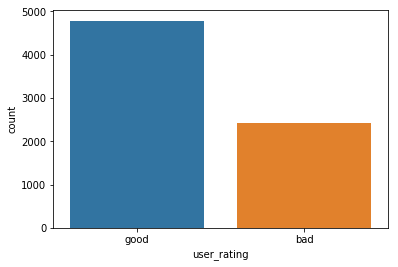

In [31]:
sns.countplot(x="user_rating", data=pd_re)


## Step 4. Data Transformation

### 4.1 Reduce the data (correlation,select)

In [32]:
df_re.printSchema()

root
 |-- size_bytes: long (nullable = true)
 |-- currency: string (nullable = true)
 |-- price: double (nullable = true)
 |-- rating_count_tot: integer (nullable = true)
 |-- rating_count_ver: integer (nullable = true)
 |-- user_rating_ver: double (nullable = true)
 |-- ver: string (nullable = true)
 |-- cont_rating: string (nullable = true)
 |-- prime_genre: string (nullable = true)
 |-- sup_devices_num: integer (nullable = true)
 |-- ipadSc_urls_num: integer (nullable = true)
 |-- lang_num: integer (nullable = true)
 |-- vpp_lic: integer (nullable = true)
 |-- user_rating: string (nullable = false)



In [33]:
#transfer string varibales to numeric variables 
from pyspark.ml.feature import StringIndexer
currency_indexer = StringIndexer(inputCol = 'currency', outputCol = 'currency_Index').fit(df_re)
df_tf1 = currency_indexer.transform(df_re).drop('currency')

In [34]:
cont_rating_indexer = StringIndexer(inputCol = 'cont_rating', outputCol = 'cont_rating_Index').fit(df_tf1)
df_tf2 = cont_rating_indexer.transform(df_tf1).drop('cont_rating')

In [35]:
prime_genre_indexer = StringIndexer(inputCol = 'prime_genre', outputCol = 'prime_genre_Index').fit(df_tf2)
df_tf3 = prime_genre_indexer.transform(df_tf2).drop('prime_genre')

In [36]:
ver_indexer = StringIndexer(inputCol = 'ver', outputCol = 'ver_Index').fit(df_tf3)
df_tf4 = ver_indexer.transform(df_tf3).drop('ver')
df_tf4.printSchema()

root
 |-- size_bytes: long (nullable = true)
 |-- price: double (nullable = true)
 |-- rating_count_tot: integer (nullable = true)
 |-- rating_count_ver: integer (nullable = true)
 |-- user_rating_ver: double (nullable = true)
 |-- sup_devices_num: integer (nullable = true)
 |-- ipadSc_urls_num: integer (nullable = true)
 |-- lang_num: integer (nullable = true)
 |-- vpp_lic: integer (nullable = true)
 |-- user_rating: string (nullable = false)
 |-- currency_Index: double (nullable = true)
 |-- cont_rating_Index: double (nullable = true)
 |-- prime_genre_Index: double (nullable = true)
 |-- ver_Index: double (nullable = true)



In [37]:
pd_tf4 = df_tf4.toPandas()
pd_tf4.head(10)

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic,user_rating,currency_Index,cont_rating_Index,prime_genre_Index,ver_Index
0,25997312,3.99,768,4,4.0,37,3,3,1,good,0.0,0.0,2.0,298.0
1,15313920,0.99,1193,1,2.0,40,5,1,1,good,0.0,3.0,0.0,305.0
2,15676416,2.99,2044,10,3.0,37,5,1,1,bad,0.0,2.0,0.0,110.0
3,169009152,2.99,25475,71,4.0,37,4,11,1,good,0.0,0.0,4.0,1433.0
4,247508992,0.99,29739,2253,5.0,43,5,1,1,good,0.0,2.0,0.0,29.0
5,791146496,13.99,818,9,2.5,37,5,1,1,bad,0.0,0.0,9.0,1223.0
6,123991040,0.00,2860,4,4.0,37,0,1,1,good,0.0,3.0,7.0,417.0
7,101564416,0.00,72,0,0.0,37,4,1,1,good,0.0,1.0,10.0,407.0
8,47773530,0.00,224,224,4.0,43,0,1,1,good,0.0,0.0,1.0,0.0
9,42598400,3.99,349,94,4.5,38,5,6,1,good,0.0,0.0,2.0,65.0


##### 1) Correlation

In [38]:
pd_tf4.corr()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic,currency_Index,cont_rating_Index,prime_genre_Index,ver_Index
size_bytes,1.000000,0.182392,0.004486,0.006337,0.086075,-0.118347,0.152697,0.004614,-0.150418,NaN,0.144335,-0.174329,-0.032011
price,0.182392,1.000000,-0.039044,-0.018012,0.025173,-0.115361,0.066100,-0.006713,-0.029942,NaN,-0.017374,0.051451,-0.032629
rating_count_tot,0.004486,-0.039044,1.000000,0.163645,0.088744,0.008832,0.015734,0.137675,-0.000982,NaN,0.002063,0.009650,0.161715
rating_count_ver,0.006337,-0.018012,0.163645,1.000000,0.077840,0.037951,0.024333,0.013287,0.006460,NaN,-0.007476,-0.015815,0.001752
user_rating_ver,0.086075,0.025173,0.088744,0.077840,1.000000,-0.018901,0.275737,0.175580,0.050094,NaN,-0.095185,-0.164455,0.020490
sup_devices_num,-0.118347,-0.115361,0.008832,0.037951,-0.018901,1.000000,-0.037728,-0.041681,-0.037109,NaN,-0.001864,-0.124398,-0.048126
ipadSc_urls_num,0.152697,0.066100,0.015734,0.024333,0.275737,-0.037728,1.000000,0.088378,0.071901,NaN,-0.083254,-0.275416,-0.018622
lang_num,0.004614,-0.006713,0.137675,0.013287,0.175580,-0.041681,0.088378,1.000000,0.032477,NaN,-0.070114,0.040644,0.131258
vpp_lic,-0.150418,-0.029942,-0.000982,0.006460,0.050094,-0.037109,0.071901,0.032477,1.000000,NaN,-0.023857,-0.009158,0.010092
currency_Index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


                   size_bytes     price  rating_count_tot  rating_count_ver  \
size_bytes           1.000000  0.182392          0.004486          0.006337   
price                0.182392  1.000000         -0.039044         -0.018012   
rating_count_tot     0.004486 -0.039044          1.000000          0.163645   
rating_count_ver     0.006337 -0.018012          0.163645          1.000000   
user_rating_ver      0.086075  0.025173          0.088744          0.077840   
sup_devices_num     -0.118347 -0.115361          0.008832          0.037951   
ipadSc_urls_num      0.152697  0.066100          0.015734          0.024333   
lang_num             0.004614 -0.006713          0.137675          0.013287   
vpp_lic             -0.150418 -0.029942         -0.000982          0.006460   
currency_Index            NaN       NaN               NaN               NaN   
cont_rating_Index    0.144335 -0.017374          0.002063         -0.007476   
prime_genre_Index   -0.174329  0.051451          0.0

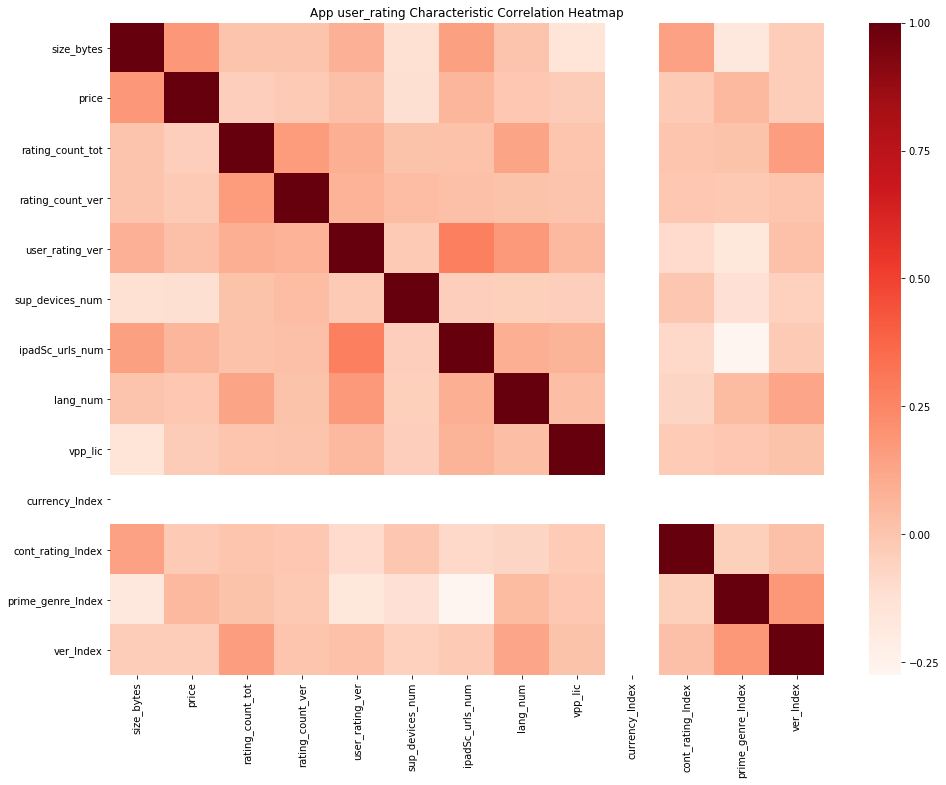

In [39]:
corr = pd_tf4.corr()
plt.subplots(figsize=(16,12))
ax = plt.axes()
ax.set_title("App user_rating Characteristic Correlation Heatmap")
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="Reds")

print(corr)

###### 2) Select relevant features

In [40]:
#According to the oorrelation above,select the features which are related to the predictor
#drop the variable "currency_index"
df_dp = df_tf4.drop('currency_Index')
df_dp.printSchema()


root
 |-- size_bytes: long (nullable = true)
 |-- price: double (nullable = true)
 |-- rating_count_tot: integer (nullable = true)
 |-- rating_count_ver: integer (nullable = true)
 |-- user_rating_ver: double (nullable = true)
 |-- sup_devices_num: integer (nullable = true)
 |-- ipadSc_urls_num: integer (nullable = true)
 |-- lang_num: integer (nullable = true)
 |-- vpp_lic: integer (nullable = true)
 |-- user_rating: string (nullable = false)
 |-- cont_rating_Index: double (nullable = true)
 |-- prime_genre_Index: double (nullable = true)
 |-- ver_Index: double (nullable = true)



In [41]:
df_rf = df_dp.drop('ver_Index')
df_rf.printSchema()

root
 |-- size_bytes: long (nullable = true)
 |-- price: double (nullable = true)
 |-- rating_count_tot: integer (nullable = true)
 |-- rating_count_ver: integer (nullable = true)
 |-- user_rating_ver: double (nullable = true)
 |-- sup_devices_num: integer (nullable = true)
 |-- ipadSc_urls_num: integer (nullable = true)
 |-- lang_num: integer (nullable = true)
 |-- vpp_lic: integer (nullable = true)
 |-- user_rating: string (nullable = false)
 |-- cont_rating_Index: double (nullable = true)
 |-- prime_genre_Index: double (nullable = true)



In [42]:
pd_rf=df_rf.toPandas()
pd_rf.corr()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic,cont_rating_Index,prime_genre_Index
size_bytes,1.000000,0.182392,0.004486,0.006337,0.086075,-0.118347,0.152697,0.004614,-0.150418,0.144335,-0.174329
price,0.182392,1.000000,-0.039044,-0.018012,0.025173,-0.115361,0.066100,-0.006713,-0.029942,-0.017374,0.051451
rating_count_tot,0.004486,-0.039044,1.000000,0.163645,0.088744,0.008832,0.015734,0.137675,-0.000982,0.002063,0.009650
rating_count_ver,0.006337,-0.018012,0.163645,1.000000,0.077840,0.037951,0.024333,0.013287,0.006460,-0.007476,-0.015815
user_rating_ver,0.086075,0.025173,0.088744,0.077840,1.000000,-0.018901,0.275737,0.175580,0.050094,-0.095185,-0.164455
sup_devices_num,-0.118347,-0.115361,0.008832,0.037951,-0.018901,1.000000,-0.037728,-0.041681,-0.037109,-0.001864,-0.124398
ipadSc_urls_num,0.152697,0.066100,0.015734,0.024333,0.275737,-0.037728,1.000000,0.088378,0.071901,-0.083254,-0.275416
lang_num,0.004614,-0.006713,0.137675,0.013287,0.175580,-0.041681,0.088378,1.000000,0.032477,-0.070114,0.040644
vpp_lic,-0.150418,-0.029942,-0.000982,0.006460,0.050094,-0.037109,0.071901,0.032477,1.000000,-0.023857,-0.009158
cont_rating_Index,0.144335,-0.017374,0.002063,-0.007476,-0.095185,-0.001864,-0.083254,-0.070114,-0.023857,1.000000,-0.044254


                   size_bytes     price  rating_count_tot  rating_count_ver  \
size_bytes           1.000000  0.182392          0.004486          0.006337   
price                0.182392  1.000000         -0.039044         -0.018012   
rating_count_tot     0.004486 -0.039044          1.000000          0.163645   
rating_count_ver     0.006337 -0.018012          0.163645          1.000000   
user_rating_ver      0.086075  0.025173          0.088744          0.077840   
sup_devices_num     -0.118347 -0.115361          0.008832          0.037951   
ipadSc_urls_num      0.152697  0.066100          0.015734          0.024333   
lang_num             0.004614 -0.006713          0.137675          0.013287   
vpp_lic             -0.150418 -0.029942         -0.000982          0.006460   
cont_rating_Index    0.144335 -0.017374          0.002063         -0.007476   
prime_genre_Index   -0.174329  0.051451          0.009650         -0.015815   

                   user_rating_ver  sup_devices_num

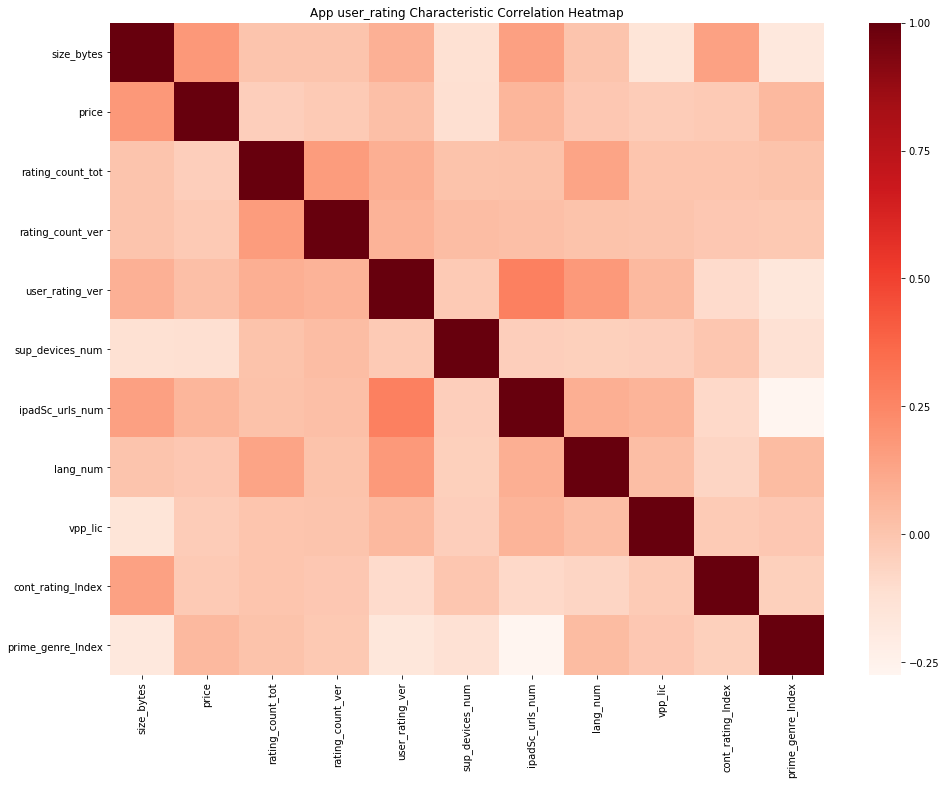

In [43]:
corr = pd_rf.corr()
plt.subplots(figsize=(16,12))
ax = plt.axes()
ax.set_title("App user_rating Characteristic Correlation Heatmap")
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="Reds")

print(corr)

### 4.2 Project the data

In [44]:
pd_rf.describe()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic,cont_rating_Index,prime_genre_Index
count,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,1.991345e+08,1.726218,1.289291e+04,460.373906,3.253578,37.361817,3.707100,5.434903,0.993053,0.694039,3.129082
std,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.809363,3.737715,1.986005,7.919593,0.083066,1.002656,5.032179
min,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.692275e+07,0.000000,2.800000e+01,1.000000,2.500000,37.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,37.000000,5.000000,1.000000,1.000000,0.000000,0.000000
75%,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,38.000000,5.000000,8.000000,1.000000,1.000000,4.000000
max,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,47.000000,5.000000,75.000000,1.000000,3.000000,22.000000


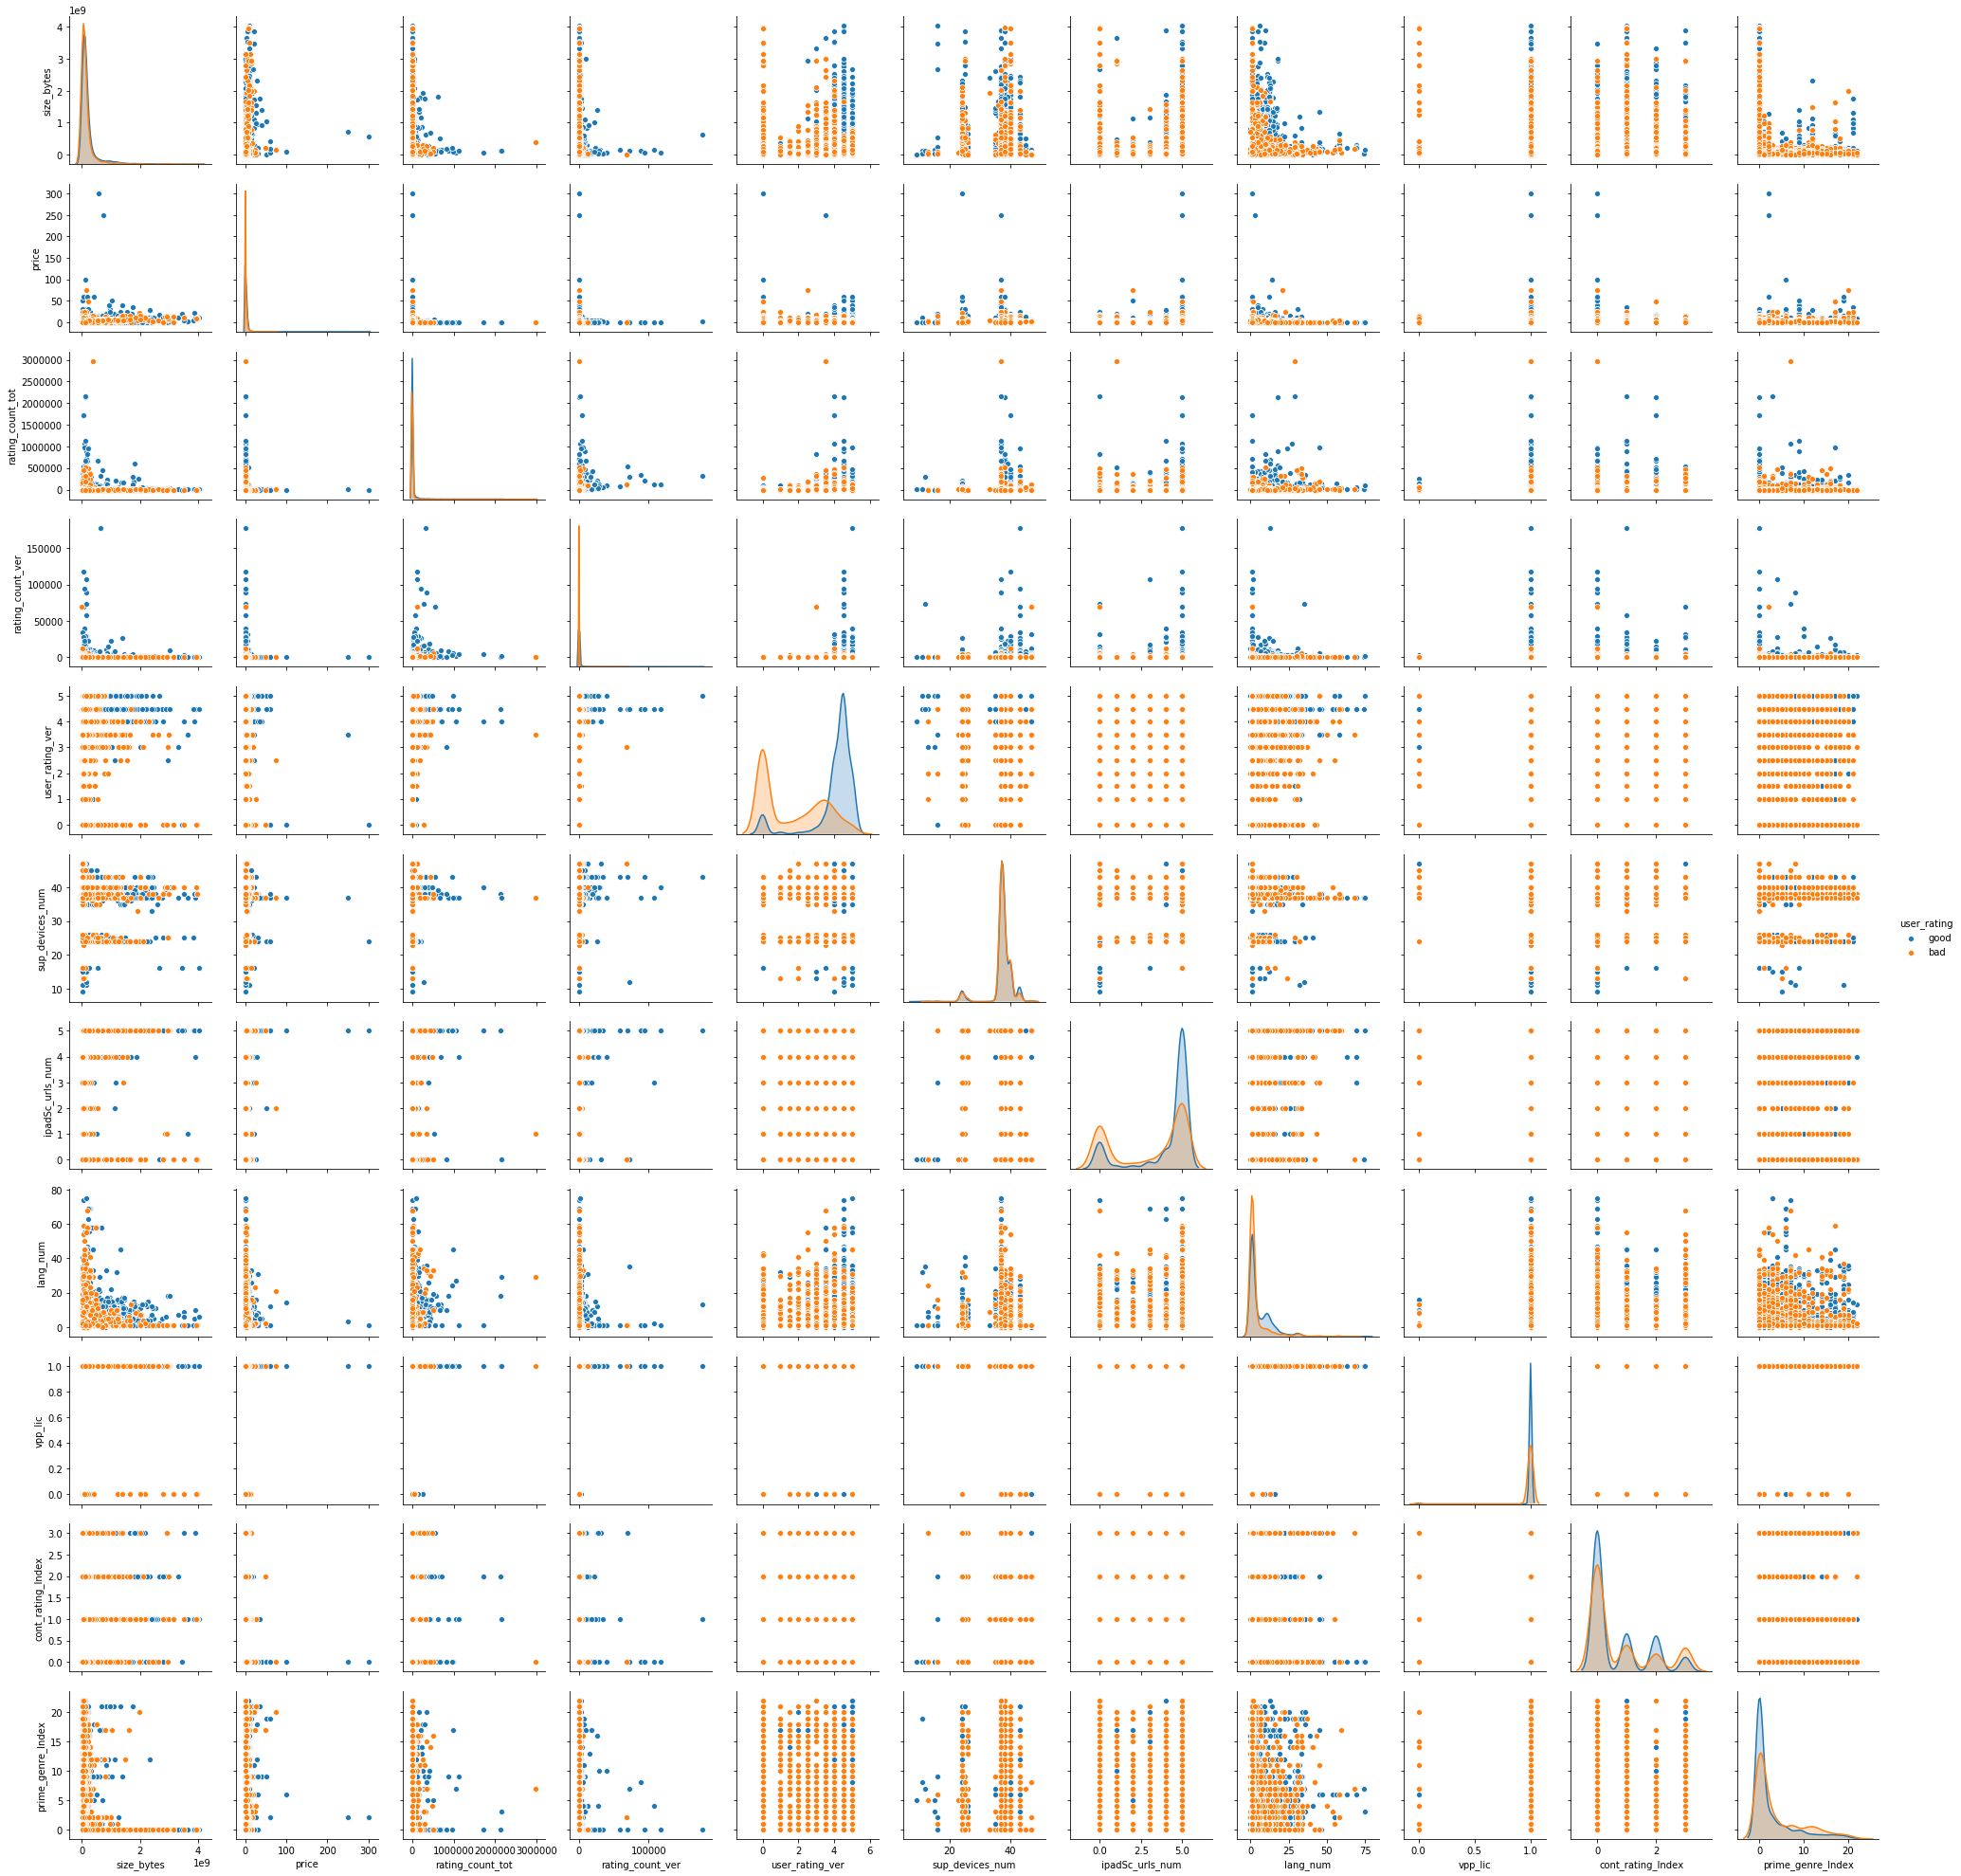

In [45]:
sns.pairplot(data=pd_rf, hue='user_rating')


In [46]:
df = df_rf
df.printSchema()
pandas = df.toPandas()
pandas.describe()

root
 |-- size_bytes: long (nullable = true)
 |-- price: double (nullable = true)
 |-- rating_count_tot: integer (nullable = true)
 |-- rating_count_ver: integer (nullable = true)
 |-- user_rating_ver: double (nullable = true)
 |-- sup_devices_num: integer (nullable = true)
 |-- ipadSc_urls_num: integer (nullable = true)
 |-- lang_num: integer (nullable = true)
 |-- vpp_lic: integer (nullable = true)
 |-- user_rating: string (nullable = false)
 |-- cont_rating_Index: double (nullable = true)
 |-- prime_genre_Index: double (nullable = true)



,size_bytes,price,rating_count_tot,rating_count_ver,user_rating_ver,sup_devices_num,ipadSc_urls_num,lang_num,vpp_lic,cont_rating_Index,prime_genre_Index
count,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,1.991345e+08,1.726218,1.289291e+04,460.373906,3.253578,37.361817,3.707100,5.434903,0.993053,0.694039,3.129082
std,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.809363,3.737715,1.986005,7.919593,0.083066,1.002656,5.032179
min,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.692275e+07,0.000000,2.800000e+01,1.000000,2.500000,37.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,37.000000,5.000000,1.000000,1.000000,0.000000,0.000000
75%,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,38.000000,5.000000,8.000000,1.000000,1.000000,4.000000
max,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,47.000000,5.000000,75.000000,1.000000,3.000000,22.000000


In [50]:
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)
from pyspark.ml import Pipeline

#convert string varible "user_rating" to numeric
user_rating_indexer = StringIndexer(inputCol='user_rating',outputCol='label')

#combine multiple variables into one vector. It can make the process quicker 
assembler = VectorAssembler(inputCols=['size_bytes','price','rating_count_tot','rating_count_ver',
                                       'user_rating_ver','sup_devices_num','ipadSc_urls_num','lang_num','vpp_lic',
                                       'cont_rating_Index', 'prime_genre_Index'], outputCol="features")
pipeline = Pipeline(stages=[user_rating_indexer, assembler])

#apply it to the DataFrame.
pipeline_model = pipeline.fit(df)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(df)
pipe_df.printSchema()

# Remove all variables other than features and label. 
output = pipe_df.select('label','features')
output.printSchema()

root
 |-- size_bytes: long (nullable = true)
 |-- price: double (nullable = true)
 |-- rating_count_tot: integer (nullable = true)
 |-- rating_count_ver: integer (nullable = true)
 |-- user_rating_ver: double (nullable = true)
 |-- sup_devices_num: integer (nullable = true)
 |-- ipadSc_urls_num: integer (nullable = true)
 |-- lang_num: integer (nullable = true)
 |-- vpp_lic: integer (nullable = true)
 |-- user_rating: string (nullable = false)
 |-- cont_rating_Index: double (nullable = true)
 |-- prime_genre_Index: double (nullable = true)
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)



## Step 6. Data Mining Algorithm Selection

### 6.3 Build/Select appropriate model(s) and choose relevant parameter(s) 

In [51]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator


In [52]:
# Split our data. Note that the new DataFrame is being used.
train, test = output.randomSplit([0.7, 0.3])
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 5059
Test Dataset Count: 2138


### 1.1 Logistics Regression

In [53]:
# Instantiate the model.
lr_model = LogisticRegression(featuresCol = 'features', 
                              labelCol = 'label',
                              regParam=0.0,
                              elasticNetParam=0.0,
                              maxIter=100)

# Fit the model.
lr_model = lr_model.fit(train)

# Evaluate the model using the test data.
#lr_results = lr_model.transform(test)
lr_results = lr_model.evaluate(test)

lr_results.predictions.show()

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|[1.4828544E7,2.99...|[1.54557353502552...|[0.82427349301884...|       0.0|
|  0.0|[2.5997312E7,3.99...|[1.32660554478780...|[0.79027859776545...|       0.0|
|  0.0|[4.6465024E7,3.99...|[2.19942704071149...|[0.90019804714708...|       0.0|
|  0.0|[7.2974336E7,2.99...|[2.35531470979786...|[0.91335574292784...|       0.0|
|  0.0|[8.0970752E7,3.99...|[2.31019550610519...|[0.90971791374046...|       0.0|
|  0.0|[1.01564416E8,0.0...|[-1.9384967543761...|[0.12581309674682...|       1.0|
|  0.0|[2.47508992E8,0.9...|[2.73129623068968...|[0.93884829894451...|       0.0|
|  0.0|[2.66102784E8,0.0...|[2.13705180662016...|[0.89445260346365...|       0.0|
|  0.0|[3.106304E8,1.99,...|[0.96448087895028...|[0.72401805418893...|       0.0|
|  1.0|(11,[0,5,

##### 1.1 Logistics Regression - Evaluation

In [54]:
# Let's import one evalulation metrics. binary is for true and false (0 and 1) predictions
# Create an instance of the evaluator (finds area under the curve).
lr_evaluator = BinaryClassificationEvaluator()

# Evaluate the predictions. 
lr_accuracy =lr_evaluator.evaluate(lr_results.predictions)

# Display the results. 
lr_accuracy


0.8690135756459941

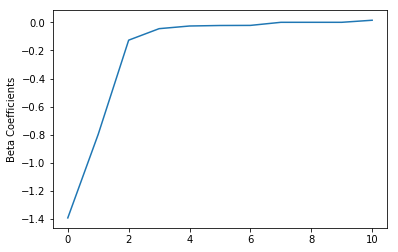

In [55]:
#Visualisation

#Now that we've trained and evaluated the model, let's use that data to generate a few graphs. For this example, we'll be using matplotlib. 
#For a binary evaluator, you can get the area under the ROC curve or the area under the precision/recall curve.

# Visualising the coefficients. Sort from lowest to highest.
beta = np.sort(lr_model.coefficients)
# Plot the data.
plt.plot(beta)
# Add a label to the data.
plt.ylabel('Beta Coefficients')
# Show the graph. 
plt.show()

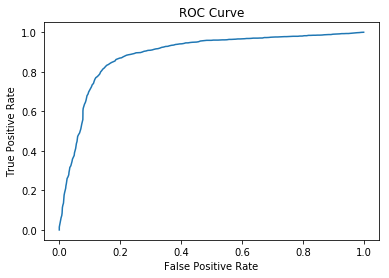

In [56]:
#ROC and AUC

# Let's get a summary of the data.
training_summary = lr_model.summary
# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()
# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])
# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

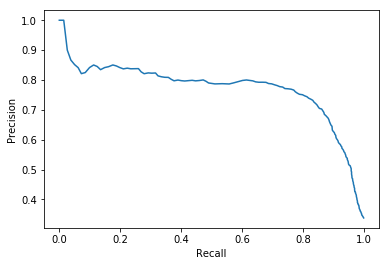

In [57]:
#Precision and recall

# Convert DataFrame to Pandas DataFrame.
pr = training_summary.pr.toPandas()
# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])
# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

### 1.2 Logistics Regression

In [58]:
# Instantiate the model.
lr_model_2 = LogisticRegression(featuresCol = 'features', 
                              labelCol = 'label',
                              regParam=0.0,
                              elasticNetParam=0.0,
                              maxIter=50)
# Fit the model.
lr_model_2 = lr_model_2.fit(train)

# Evaluate the model using the test data.
#lr_results = lr_model.transform(test)
lr_results_2 = lr_model_2.evaluate(test)
lr_results_2.predictions.show()

#Evaluation
# Create an instance of the evaluator (finds area under the curve).
lr_evaluator_2 = BinaryClassificationEvaluator()
# Evaluate the predictions. 
lr_accuracy_2 = lr_evaluator_2.evaluate(lr_results_2.predictions)
# Display the results. 
lr_accuracy_2

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|[1.4828544E7,2.99...|[1.53902607546203...|[0.82332310064933...|       0.0|
|  0.0|[2.5997312E7,3.99...|[1.32034737007154...|[0.78923949404439...|       0.0|
|  0.0|[4.6465024E7,3.99...|[2.21678855883607...|[0.90174703105909...|       0.0|
|  0.0|[7.2974336E7,2.99...|[2.34922723925994...|[0.91287278481887...|       0.0|
|  0.0|[8.0970752E7,3.99...|[2.33025211776317...|[0.91135170739459...|       0.0|
|  0.0|[1.01564416E8,0.0...|[-1.9290406849324...|[0.12685679981150...|       1.0|
|  0.0|[2.47508992E8,0.9...|[2.72386496088254...|[0.93842025966329...|       0.0|
|  0.0|[2.66102784E8,0.0...|[2.13666595732285...|[0.89441617098908...|       0.0|
|  0.0|[3.106304E8,1.99,...|[0.95281125469577...|[0.72168019246028...|       0.0|
|  1.0|(11,[0,5,

0.8688997441265413

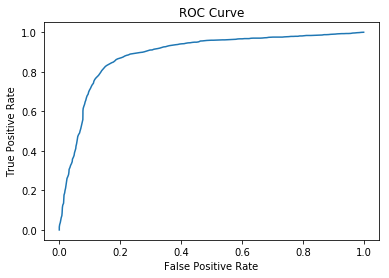

In [59]:
#ROC and AUC

# Let's get a summary of the data.
training_summary_2 = lr_model_2.summary
# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary_2.roc.toPandas()
# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])
# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

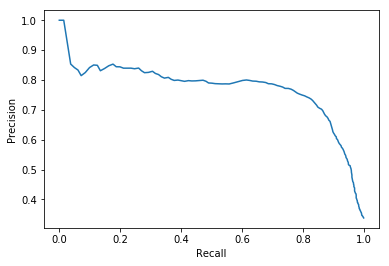

In [60]:
#Precision and recall

# Convert DataFrame to Pandas DataFrame.
pr_2 = training_summary_2.pr.toPandas()
# Plot model recall and precision.
plt.plot(pr_2['recall'],pr_2['precision'])
# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

### 1.3 Logistics Regression

In [61]:
# Instantiate the model.
lr_model_3 = LogisticRegression(featuresCol = 'features', 
                              labelCol = 'label',
                              regParam=30.0,
                              elasticNetParam=0.0,
                              maxIter=50)
# Fit the model.
lr_model_3 = lr_model_3.fit(train)

# Evaluate the model using the test data.
#lr_results = lr_model.transform(test)
lr_results_3 = lr_model_3.evaluate(test)
lr_results_3.predictions.show()

#Evaluation
# Create an instance of the evaluator (finds area under the curve).
lr_evaluator_3 = BinaryClassificationEvaluator()
# Evaluate the predictions. 
lr_accuracy_3 = lr_evaluator_3.evaluate(lr_results_3.predictions)
# Display the results. 
lr_accuracy_3

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|[1.4828544E7,2.99...|[0.67835928423216...|[0.66337240832357...|       0.0|
|  0.0|[2.5997312E7,3.99...|[0.67402046146790...|[0.66240282240752...|       0.0|
|  0.0|[4.6465024E7,3.99...|[0.67810891455983...|[0.66331649612148...|       0.0|
|  0.0|[7.2974336E7,2.99...|[0.68608940584431...|[0.66509643174275...|       0.0|
|  0.0|[8.0970752E7,3.99...|[0.67948601547541...|[0.66362397173118...|       0.0|
|  0.0|[1.01564416E8,0.0...|[0.64882173472104...|[0.65674489418624...|       0.0|
|  0.0|[2.47508992E8,0.9...|[0.68398557106048...|[0.66462765426737...|       0.0|
|  0.0|[2.66102784E8,0.0...|[0.68443601642334...|[0.66472805007207...|       0.0|
|  0.0|[3.106304E8,1.99,...|[0.67079198653457...|[0.66168047554813...|       0.0|
|  1.0|(11,[0,5,

0.8413693436870529

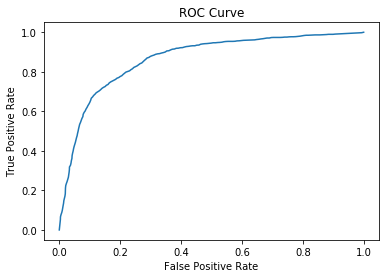

In [62]:
#ROC and AUC

# Let's get a summary of the data.
training_summary_3 = lr_model_3.summary
# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary_3.roc.toPandas()
# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])
# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

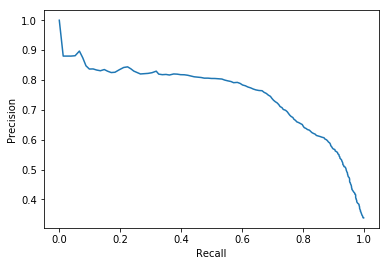

In [63]:
#Precision and recall

# Convert DataFrame to Pandas DataFrame.
pr_3 = training_summary_3.pr.toPandas()
# Plot model recall and precision.
plt.plot(pr_3['recall'],pr_3['precision'])
# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

### 2.1 Random Forest 

In [64]:
rf_model = RandomForestClassifier(labelCol="label", 
                            featuresCol="features", 
                            numTrees=3)
# Fit the model.
rf_model = rf_model.fit(train)

# Evaluate the model using the test data.
rf_results = rf_model.transform(test)
rf_results.show()

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|[1.4828544E7,2.99...|[2.53401496449144...|[0.84467165483048...|       0.0|
|  0.0|[2.5997312E7,3.99...|[2.30407590689280...|[0.76802530229760...|       0.0|
|  0.0|[4.6465024E7,3.99...|[2.75561019231451...|[0.91853673077150...|       0.0|
|  0.0|[7.2974336E7,2.99...|[2.83732030422995...|[0.94577343474331...|       0.0|
|  0.0|[8.0970752E7,3.99...|[2.77164089986430...|[0.92388029995476...|       0.0|
|  0.0|[1.01564416E8,0.0...|[1.80046035805626...|[0.60015345268542...|       0.0|
|  0.0|[2.47508992E8,0.9...|[2.92599521197943...|[0.97533173732647...|       0.0|
|  0.0|[2.66102784E8,0.0...|[2.92526926589359...|[0.97508975529786...|       0.0|
|  0.0|[3.106304E8,1.99,...|[1.12347947668031...|[0.37449315889343...|       1.0|
|  1.0|(11,[0,5,

##### 2.1 Random Forest - Evaluation

In [65]:
# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(labelCol="label", 
                                predictionCol="prediction", 
                                metricName="rmse")
rmse = evaluator.evaluate(rf_results)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 0.389286


In [66]:
# Create an instance of the evaluator (finds area under the curve).
rf_evaluator = BinaryClassificationEvaluator()

# Evaluate the predictions. 
rf_accuracy = rf_evaluator.evaluate(rf_results)

# Display the results. 
rf_accuracy

0.9056089243911247

In [67]:
import pandas 
feature_Importances = rf_model.featureImportances
rfmodel= pandas.DataFrame(feature_Importances.toArray(), index=['size_bytes','price','rating_count_tot','rating_count_ver',
                                       'user_rating_ver','sup_devices_num','ipadSc_urls_num','lang_num','vpp_lic',
                                       'cont_rating_Index', 'prime_genre_Index'], 
             columns=["importance"])
rfmodel.sort_values('importance', ascending=False)

,importance
user_rating_ver,0.656725
rating_count_tot,0.150993
lang_num,0.056976
ipadSc_urls_num,0.053687
rating_count_ver,0.039541
prime_genre_Index,0.019541
size_bytes,0.014914
price,0.004084
sup_devices_num,0.001883
vpp_lic,0.001167


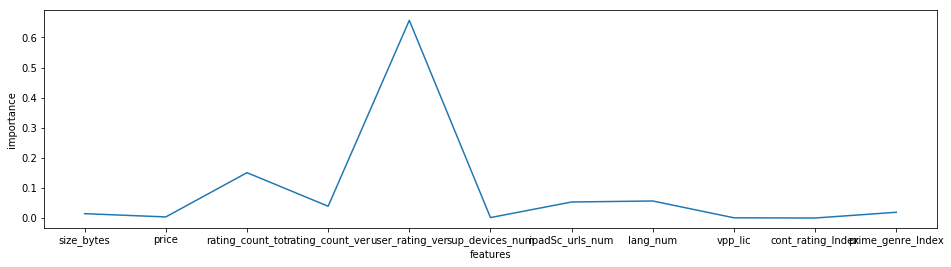

In [68]:
# Plot size
plt.subplots(figsize=(16,4))
# Plot feature importance
plt.plot(rfmodel)
# Define the labels and show the graph. 
plt.ylabel('importance')
plt.xlabel('features')
plt.show()

### 2.2 Random Forest 

In [69]:
rf_model_2 = RandomForestClassifier(labelCol="label", 
                            featuresCol="features", 
                            numTrees=6)
# Fit the model.
rf_model_2 = rf_model_2.fit(train)
# Evaluate the model using the test data.
rf_results_2 = rf_model_2.transform(test)
rf_results_2.show()

#Evaluation
# Select (prediction, true label) and compute test error
rf_evaluator_2 = RegressionEvaluator(labelCol="label", 
                                predictionCol="prediction", 
                                metricName="rmse")
rmse_2 = rf_evaluator_2.evaluate(rf_results_2)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

# Create an instance of the evaluator (finds area under the curve).
rf_evaluator_2 = BinaryClassificationEvaluator()
# Evaluate the predictions. 
rf_accuracy_2 = rf_evaluator_2.evaluate(rf_results_2)
# Display the results. 
rf_accuracy_2

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|[1.4828544E7,2.99...|[5.01645327375082...|[0.83607554562513...|       0.0|
|  0.0|[2.5997312E7,3.99...|[4.43702478659875...|[0.73950413109979...|       0.0|
|  0.0|[4.6465024E7,3.99...|[5.16100125682646...|[0.86016687613774...|       0.0|
|  0.0|[7.2974336E7,2.99...|[5.79074303370951...|[0.96512383895158...|       0.0|
|  0.0|[8.0970752E7,3.99...|[5.75032015090297...|[0.95838669181716...|       0.0|
|  0.0|[1.01564416E8,0.0...|[2.71152786139541...|[0.45192131023256...|       1.0|
|  0.0|[2.47508992E8,0.9...|[5.79598223263857...|[0.96599703877309...|       0.0|
|  0.0|[2.66102784E8,0.0...|[5.65242438602907...|[0.94207073100484...|       0.0|
|  0.0|[3.106304E8,1.99,...|[1.62834474452813...|[0.27139079075468...|       1.0|
|  1.0|(11,[0,5,

0.9057168168747807

In [70]:
import pandas 
feature_Importances = rf_model_2.featureImportances
rfmodel2 = pandas.DataFrame(feature_Importances.toArray(), index=['size_bytes','price','rating_count_tot','rating_count_ver',
                                       'user_rating_ver','sup_devices_num','ipadSc_urls_num','lang_num','vpp_lic',
                                       'cont_rating_Index', 'prime_genre_Index'], 
             columns=["importance"])
rfmodel2.sort_values('importance', ascending=False)

,importance
user_rating_ver,0.510372
rating_count_tot,0.254329
rating_count_ver,0.089390
ipadSc_urls_num,0.064800
lang_num,0.028760
size_bytes,0.018412
prime_genre_Index,0.018185
sup_devices_num,0.006747
price,0.004399
cont_rating_Index,0.003239


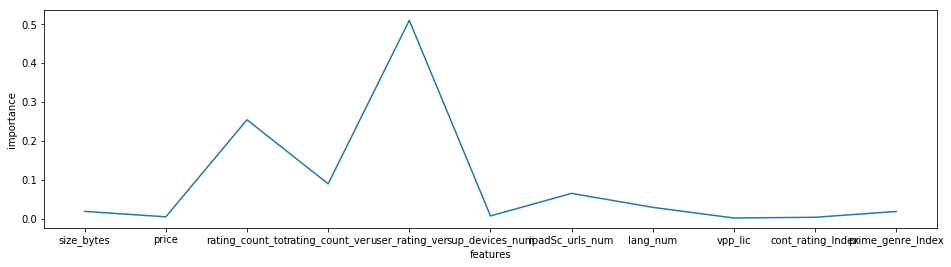

In [71]:
# Plot size
plt.subplots(figsize=(16,4))
# Plot feature importance
plt.plot(rfmodel2)
# Define the labels and show the graph. 
plt.ylabel('importance')
plt.xlabel('features')
plt.show()

### 2.3 Random Forest

In [72]:
rf_model_3 = RandomForestClassifier(labelCol="label", 
                            featuresCol="features", 
                            numTrees=9)
# Fit the model.
rf_model_3 = rf_model_3.fit(train)
# Evaluate the model using the test data.
rf_results_3 = rf_model_3.transform(test)
rf_results_3.show()

#Evaluation
# Select (prediction, true label) and compute test error
rf_evaluator_3 = RegressionEvaluator(labelCol="label", 
                                predictionCol="prediction", 
                                metricName="rmse")
rmse_3 = rf_evaluator_3.evaluate(rf_results_3)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

# Create an instance of the evaluator (finds area under the curve).
rf_evaluator_3 = BinaryClassificationEvaluator()
# Evaluate the predictions. 
rf_accuracy_3 = rf_evaluator_3.evaluate(rf_results_3)
# Display the results. 
rf_accuracy_3

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|[1.4828544E7,2.99...|[8.01733745884580...|[0.89081527320508...|       0.0|
|  0.0|[2.5997312E7,3.99...|[7.05274565225737...|[0.78363840580637...|       0.0|
|  0.0|[4.6465024E7,3.99...|[8.16935075568908...|[0.90770563952100...|       0.0|
|  0.0|[7.2974336E7,2.99...|[8.72603598977094...|[0.96955955441899...|       0.0|
|  0.0|[8.0970752E7,3.99...|[8.42446707142084...|[0.93605189682453...|       0.0|
|  0.0|[1.01564416E8,0.0...|[4.11676264533116...|[0.45741807170346...|       1.0|
|  0.0|[2.47508992E8,0.9...|[8.75854895688283...|[0.97317210632031...|       0.0|
|  0.0|[2.66102784E8,0.0...|[8.53774281403741...|[0.94863809044860...|       0.0|
|  0.0|[3.106304E8,1.99,...|[3.58671838054592...|[0.39852426450510...|       1.0|
|  1.0|(11,[0,5,

0.9116479339579222

In [73]:
import pandas 
feature_Importances = rf_model_3.featureImportances
rfmodel3 = pandas.DataFrame(feature_Importances.toArray(), index=['size_bytes','price','rating_count_tot','rating_count_ver',
                                       'user_rating_ver','sup_devices_num','ipadSc_urls_num','lang_num','vpp_lic',
                                       'cont_rating_Index', 'prime_genre_Index'], 
             columns=["importance"])
rfmodel3.sort_values('importance', ascending=False)

,importance
user_rating_ver,0.535301
rating_count_tot,0.217865
rating_count_ver,0.133142
ipadSc_urls_num,0.043051
lang_num,0.027013
size_bytes,0.018504
prime_genre_Index,0.016197
sup_devices_num,0.003034
price,0.002890
cont_rating_Index,0.001812


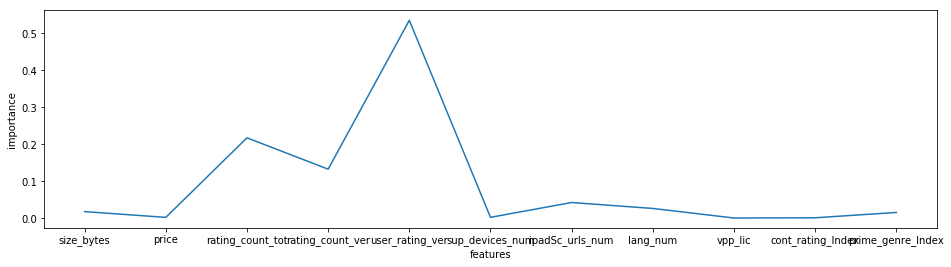

In [74]:
# Plot size
plt.subplots(figsize=(16,4))
# Plot feature importance
plt.plot(rfmodel3)
# Define the labels and show the graph. 
plt.ylabel('importance')
plt.xlabel('features')
plt.show()

### 3.1 Decision Tree

In [75]:
from pyspark.ml.classification import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(featuresCol='features', \
                                  labelCol='label',
                                  maxDepth=5) 
# Fit the model.
dt_model = dt_model.fit(train)

# Evaluate the model using the test data.
#lr_results = lr_model.transform(test)
dt_results = dt_model.transform(test)
dt_results.show()

+-----+--------------------+-------------+--------------------+----------+
|label|            features|rawPrediction|         probability|prediction|
+-----+--------------------+-------------+--------------------+----------+
|  0.0|[1.4828544E7,2.99...| [195.0,38.0]|[0.83690987124463...|       0.0|
|  0.0|[2.5997312E7,3.99...|  [66.0,30.0]|     [0.6875,0.3125]|       0.0|
|  0.0|[4.6465024E7,3.99...|[1264.0,15.0]|[0.98827208756841...|       0.0|
|  0.0|[7.2974336E7,2.99...|[1264.0,15.0]|[0.98827208756841...|       0.0|
|  0.0|[8.0970752E7,3.99...|[1264.0,15.0]|[0.98827208756841...|       0.0|
|  0.0|[1.01564416E8,0.0...|[137.0,180.0]|[0.43217665615141...|       1.0|
|  0.0|[2.47508992E8,0.9...|[1264.0,15.0]|[0.98827208756841...|       0.0|
|  0.0|[2.66102784E8,0.0...|[1264.0,15.0]|[0.98827208756841...|       0.0|
|  0.0|[3.106304E8,1.99,...| [60.0,143.0]|[0.29556650246305...|       1.0|
|  1.0|(11,[0,5,6,7,8],[...|  [0.0,708.0]|           [0.0,1.0]|       1.0|
|  1.0|(11,[0,5,7,8,9,10.

In [76]:
# Create an instance of the evaluator (finds area under the curve).
dt_evaluator = BinaryClassificationEvaluator()
# Evaluate the predictions. 
dt_accuracy = dt_evaluator.evaluate(dt_results)
# Display the results. 
dt_accuracy

0.8940208757108283

In [77]:
import pandas 
feature_Importances = dt_model.featureImportances
dtmodel = pandas.DataFrame(feature_Importances.toArray(), index=['size_bytes','price','rating_count_tot','rating_count_ver',
                                       'user_rating_ver','sup_devices_num','ipadSc_urls_num','lang_num','vpp_lic',
                                       'cont_rating_Index', 'prime_genre_Index'], 
             columns=["importance"])
dtmodel.sort_values('importance', ascending=False)

,importance
user_rating_ver,0.798682
rating_count_tot,0.137787
rating_count_ver,0.042597
prime_genre_Index,0.013879
sup_devices_num,0.003068
vpp_lic,0.002359
size_bytes,0.001237
ipadSc_urls_num,0.000390
price,0.000000
lang_num,0.000000


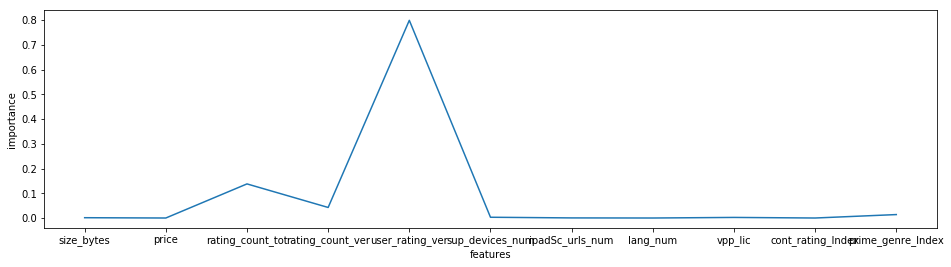

In [78]:
# Plot size
plt.subplots(figsize=(16,4))
# Plot feature importance
plt.plot(dtmodel)
# Define the labels and show the graph. 
plt.ylabel('importance')
plt.xlabel('features')
plt.show()

### 3.2 Decision Tree

In [79]:
dt_model_2 = DecisionTreeClassifier(featuresCol='features', \
                                  labelCol='label',
                                  maxDepth=10) 
# Fit the model.
dt_model_2 = dt_model_2.fit(train)

# Evaluate the model using the test data.
#lr_results = lr_model.transform(test)
dt_results_2 = dt_model_2.transform(test)
dt_results_2.show()

# Create an instance of the evaluator (finds area under the curve).
dt_evaluator_2 = BinaryClassificationEvaluator()
# Evaluate the predictions. 
dt_accuracy_2 = dt_evaluator_2.evaluate(dt_results_2)
# Display the results. 
dt_accuracy_2

+-----+--------------------+-------------+--------------------+----------+
|label|            features|rawPrediction|         probability|prediction|
+-----+--------------------+-------------+--------------------+----------+
|  0.0|[1.4828544E7,2.99...|   [16.0,2.0]|[0.88888888888888...|       0.0|
|  0.0|[2.5997312E7,3.99...|  [16.0,11.0]|[0.59259259259259...|       0.0|
|  0.0|[4.6465024E7,3.99...|   [35.0,0.0]|           [1.0,0.0]|       0.0|
|  0.0|[7.2974336E7,2.99...|  [703.0,0.0]|           [1.0,0.0]|       0.0|
|  0.0|[8.0970752E7,3.99...|   [51.0,0.0]|           [1.0,0.0]|       0.0|
|  0.0|[1.01564416E8,0.0...|  [68.0,60.0]|   [0.53125,0.46875]|       0.0|
|  0.0|[2.47508992E8,0.9...|  [703.0,0.0]|           [1.0,0.0]|       0.0|
|  0.0|[2.66102784E8,0.0...|  [703.0,0.0]|           [1.0,0.0]|       0.0|
|  0.0|[3.106304E8,1.99,...|    [0.0,2.0]|           [0.0,1.0]|       1.0|
|  1.0|(11,[0,5,6,7,8],[...|  [0.0,708.0]|           [0.0,1.0]|       1.0|
|  1.0|(11,[0,5,7,8,9,10.

0.8584811905787095

In [80]:
import pandas 
feature_Importances = dt_model_2.featureImportances
dtmodel2 = pandas.DataFrame(feature_Importances.toArray(), index=['size_bytes','price','rating_count_tot','rating_count_ver',
                                       'user_rating_ver','sup_devices_num','ipadSc_urls_num','lang_num','vpp_lic',
                                       'cont_rating_Index', 'prime_genre_Index'], 
             columns=["importance"])
dtmodel2.sort_values('importance', ascending=False)

,importance
user_rating_ver,0.625079
rating_count_tot,0.136519
rating_count_ver,0.064614
prime_genre_Index,0.054403
size_bytes,0.052984
price,0.016628
sup_devices_num,0.012482
lang_num,0.012181
cont_rating_Index,0.011952
ipadSc_urls_num,0.011332


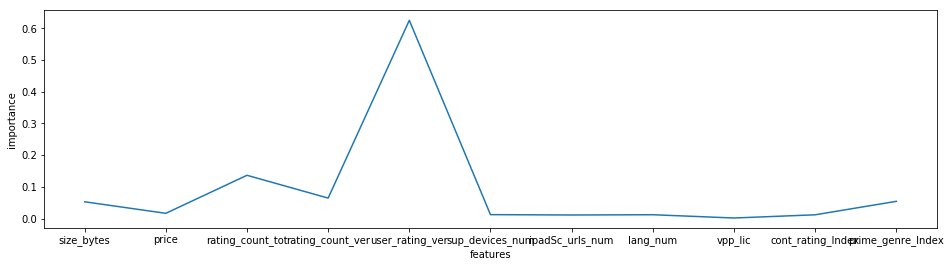

In [81]:
# Plot size
plt.subplots(figsize=(16,4))
# Plot feature importance
plt.plot(dtmodel2)
# Define the labels and show the graph. 
plt.ylabel('importance')
plt.xlabel('features')
plt.show()

### 3.3 Decision Tree

In [82]:
dt_model_3 = DecisionTreeClassifier(featuresCol='features', \
                                  labelCol='label',
                                  maxDepth=15) 
# Fit the model.
dt_model_3 = dt_model_3.fit(train)

# Evaluate the model using the test data.
#lr_results = lr_model.transform(test)
dt_results_3 = dt_model_3.transform(test)
dt_results_3.show()

# Create an instance of the evaluator (finds area under the curve).
dt_evaluator_3 = BinaryClassificationEvaluator()
# Evaluate the predictions. 
dt_accuracy_3 = dt_evaluator_3.evaluate(dt_results_3)
# Display the results. 
dt_accuracy_3

+-----+--------------------+-------------+--------------------+----------+
|label|            features|rawPrediction|         probability|prediction|
+-----+--------------------+-------------+--------------------+----------+
|  0.0|[1.4828544E7,2.99...|   [12.0,0.0]|           [1.0,0.0]|       0.0|
|  0.0|[2.5997312E7,3.99...|    [0.0,2.0]|           [0.0,1.0]|       1.0|
|  0.0|[4.6465024E7,3.99...|   [35.0,0.0]|           [1.0,0.0]|       0.0|
|  0.0|[7.2974336E7,2.99...|  [703.0,0.0]|           [1.0,0.0]|       0.0|
|  0.0|[8.0970752E7,3.99...|   [51.0,0.0]|           [1.0,0.0]|       0.0|
|  0.0|[1.01564416E8,0.0...|  [13.0,18.0]|[0.41935483870967...|       1.0|
|  0.0|[2.47508992E8,0.9...|  [703.0,0.0]|           [1.0,0.0]|       0.0|
|  0.0|[2.66102784E8,0.0...|  [703.0,0.0]|           [1.0,0.0]|       0.0|
|  0.0|[3.106304E8,1.99,...|    [0.0,2.0]|           [0.0,1.0]|       1.0|
|  1.0|(11,[0,5,6,7,8],[...|  [0.0,708.0]|           [0.0,1.0]|       1.0|
|  1.0|(11,[0,5,7,8,9,10.

0.8502383038113762

In [83]:
import pandas 
feature_Importances = dt_model_3.featureImportances
dtmodel3 = pandas.DataFrame(feature_Importances.toArray(), index=['size_bytes','price','rating_count_tot','rating_count_ver',
                                       'user_rating_ver','sup_devices_num','ipadSc_urls_num','lang_num','vpp_lic',
                                       'cont_rating_Index', 'prime_genre_Index'], 
             columns=["importance"])
dtmodel3.sort_values('importance', ascending=False)

,importance
user_rating_ver,0.523150
rating_count_tot,0.144489
size_bytes,0.095651
rating_count_ver,0.070942
prime_genre_Index,0.058019
price,0.029818
sup_devices_num,0.021635
cont_rating_Index,0.021055
lang_num,0.019483
ipadSc_urls_num,0.014238


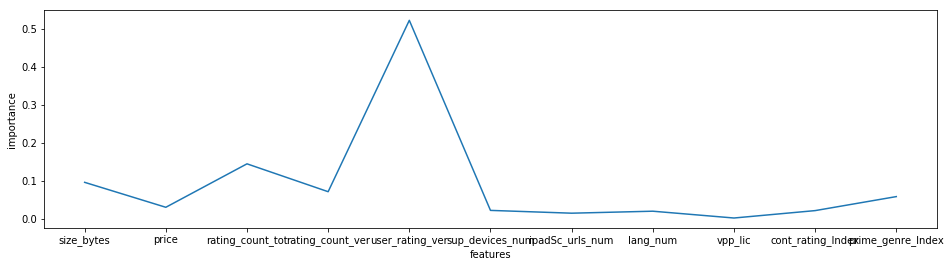

In [84]:
# Plot size
plt.subplots(figsize=(16,4))
# Plot feature importance
plt.plot(dtmodel3)
# Define the labels and show the graph. 
plt.ylabel('importance')
plt.xlabel('features')
plt.show()

### Other Iterations

### 2.4 Random Forest

In [85]:
#from the models above, we have the most accuracy result from random forest. 
#therefore, i will use different parameters in the random forest model

rf_model_4 = RandomForestClassifier(labelCol="label", 
                            featuresCol="features", 
                            numTrees=2)
# Fit the model.
rf_model_4 = rf_model_4.fit(train)
# Evaluate the model using the test data.
rf_results_4 = rf_model_4.transform(test)
rf_results_4.show()

#Evaluation
# Select (prediction, true label) and compute test error
evaluator_4 = RegressionEvaluator(labelCol="label", 
                                predictionCol="prediction", 
                                metricName="rmse")
rmse_4 = evaluator.evaluate(rf_results_4)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

# Create an instance of the evaluator (finds area under the curve).
rf_evaluator_4 = BinaryClassificationEvaluator()
# Evaluate the predictions. 
rf_accuracy_4 = rf_evaluator_4.evaluate(rf_results_4)
# Display the results. 
rf_accuracy_4

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|[1.4828544E7,2.99...|[1.78860002280521...|[0.89430001140260...|       0.0|
|  0.0|[2.5997312E7,3.99...|[1.01254762843253...|[0.50627381421626...|       0.0|
|  0.0|[4.6465024E7,3.99...|[1.93845468209304...|[0.96922734104652...|       0.0|
|  0.0|[7.2974336E7,2.99...|[1.87179515402339...|[0.93589757701169...|       0.0|
|  0.0|[8.0970752E7,3.99...|[1.83834632673128...|[0.91917316336564...|       0.0|
|  0.0|[1.01564416E8,0.0...|[0.90889694041867...|[0.45444847020933...|       1.0|
|  0.0|[2.47508992E8,0.9...|[1.93845468209304...|[0.96922734104652...|       0.0|
|  0.0|[2.66102784E8,0.0...|[1.87179515402339...|[0.93589757701169...|       0.0|
|  0.0|[3.106304E8,1.99,...|[0.51407867494824...|[0.25703933747412...|       1.0|
|  1.0|(11,[0,5,

0.8985211800864129

In [86]:
import pandas 
feature_Importances = rf_model_4.featureImportances
rfmodel4 = pandas.DataFrame(feature_Importances.toArray(), index=['size_bytes','price','rating_count_tot','rating_count_ver',
                                       'user_rating_ver','sup_devices_num','ipadSc_urls_num','lang_num','vpp_lic',
                                       'cont_rating_Index', 'prime_genre_Index'], 
             columns=["importance"])
rfmodel4.sort_values('importance', ascending=False)

,importance
user_rating_ver,0.675162
rating_count_tot,0.106966
lang_num,0.078574
ipadSc_urls_num,0.061743
size_bytes,0.027366
rating_count_ver,0.024618
prime_genre_Index,0.017641
sup_devices_num,0.007930
price,0.000000
vpp_lic,0.000000


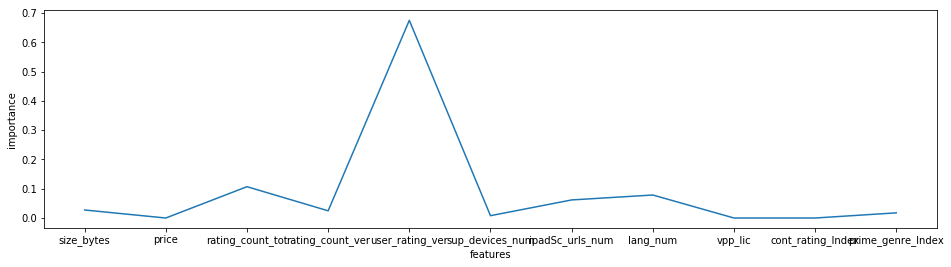

In [87]:
# Plot size
plt.subplots(figsize=(16,4))
# Plot feature importance
plt.plot(rfmodel4)
# Define the labels and show the graph. 
plt.ylabel('importance')
plt.xlabel('features')
plt.show()

### 3.4 Decision Tree

In [88]:
dt_model_4 = DecisionTreeClassifier(featuresCol='features', \
                                  labelCol='label',
                                  maxDepth=3) 
# Fit the model.
dt_model_4 = dt_model_4.fit(train)

# Evaluate the model using the test data.
#lr_results = lr_model.transform(test)
dt_results_4 = dt_model_4.transform(test)
dt_results_4.show()

# Create an instance of the evaluator (finds area under the curve).
dt_evaluator_4 = BinaryClassificationEvaluator()
# Evaluate the predictions. 
dt_accuracy_4 = dt_evaluator_4.evaluate(dt_results_4)
# Display the results. 
dt_accuracy_4

+-----+--------------------+-------------+--------------------+----------+
|label|            features|rawPrediction|         probability|prediction|
+-----+--------------------+-------------+--------------------+----------+
|  0.0|[1.4828544E7,2.99...| [533.0,67.0]|[0.88833333333333...|       0.0|
|  0.0|[2.5997312E7,3.99...| [357.0,84.0]|[0.80952380952380...|       0.0|
|  0.0|[4.6465024E7,3.99...|[1506.0,34.0]|[0.97792207792207...|       0.0|
|  0.0|[7.2974336E7,2.99...|[1506.0,34.0]|[0.97792207792207...|       0.0|
|  0.0|[8.0970752E7,3.99...|[1506.0,34.0]|[0.97792207792207...|       0.0|
|  0.0|[1.01564416E8,0.0...|[301.0,249.0]|[0.54727272727272...|       0.0|
|  0.0|[2.47508992E8,0.9...|[1506.0,34.0]|[0.97792207792207...|       0.0|
|  0.0|[2.66102784E8,0.0...|[1506.0,34.0]|[0.97792207792207...|       0.0|
|  0.0|[3.106304E8,1.99,...|[207.0,521.0]|[0.28434065934065...|       1.0|
|  1.0|(11,[0,5,6,7,8],[...|  [0.0,708.0]|           [0.0,1.0]|       1.0|
|  1.0|(11,[0,5,7,8,9,10.

0.9058232245994863

In [89]:
import pandas 
feature_Importances = dt_model_3.featureImportances
dtmodel3 = pandas.DataFrame(feature_Importances.toArray(), index=['size_bytes','price','rating_count_tot','rating_count_ver',
                                       'user_rating_ver','sup_devices_num','ipadSc_urls_num','lang_num','vpp_lic',
                                       'cont_rating_Index', 'prime_genre_Index'], 
             columns=["importance"])
dtmodel3.sort_values('importance', ascending=False)


,importance
user_rating_ver,0.523150
rating_count_tot,0.144489
size_bytes,0.095651
rating_count_ver,0.070942
prime_genre_Index,0.058019
price,0.029818
sup_devices_num,0.021635
cont_rating_Index,0.021055
lang_num,0.019483
ipadSc_urls_num,0.014238


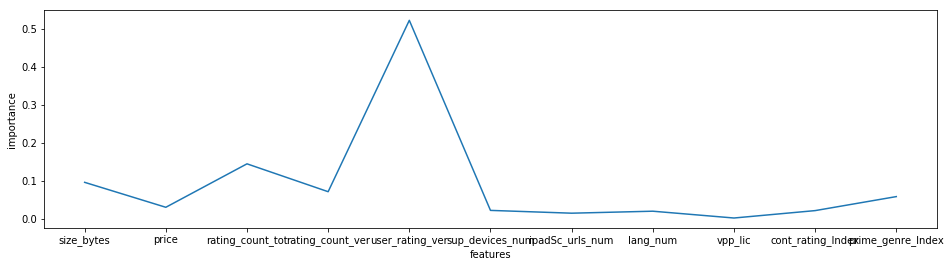

In [91]:
# Plot size
plt.subplots(figsize=(16,4))
# Plot feature importance
plt.plot(dtmodel3)
# Define the labels and show the graph. 
plt.ylabel('importance')
plt.xlabel('features')
plt.show()

In [92]:
#iteration 4 is done by now